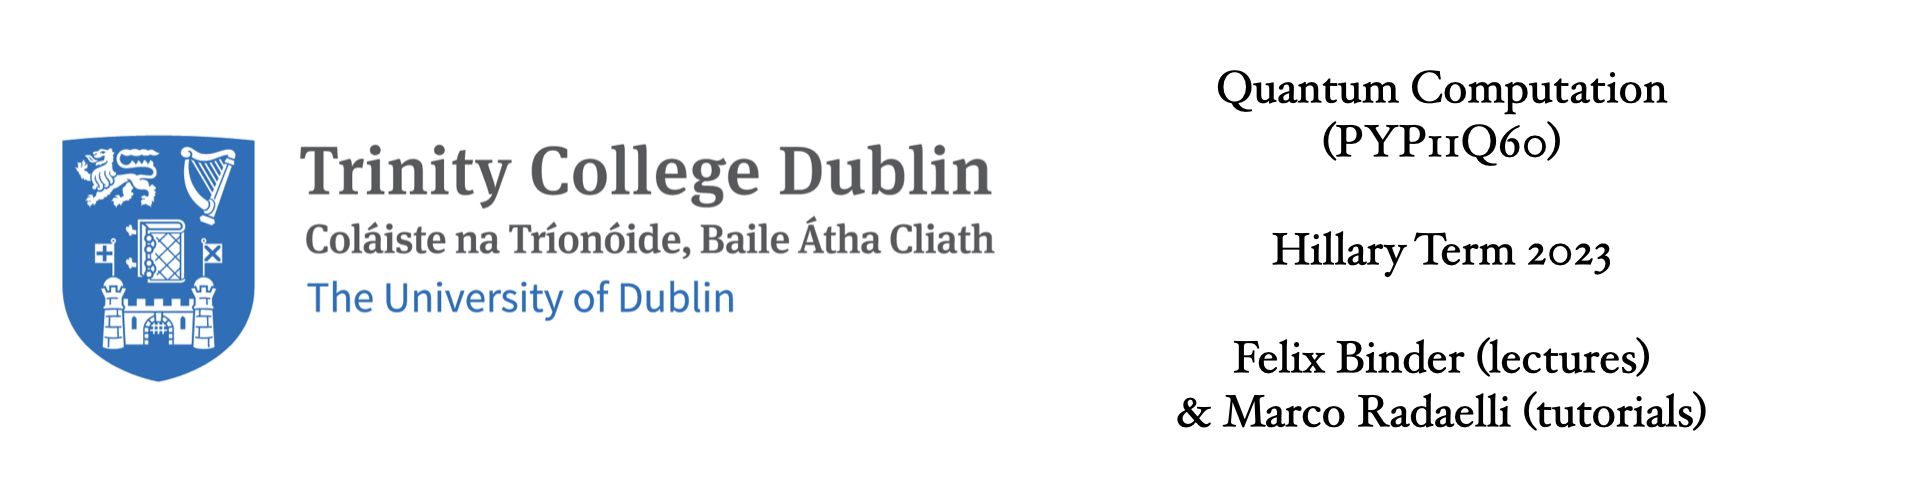

# Problem set 2

## General directions
<ul>
    <li>Some of the following exercises are numerical. They should be performed directly within this notebook. Other exercises are analytical, and should be solved on attached documents. You may submit handwritten solutions for the latter, but please make sure to write in a comprehensible manner.</li>
    <li>For the numerical tasks, please comment your code to explain what does what. Use meaningful names for variables and functions. </li>
    <li>We will need to be able to run the notebook. Make sure that there are no dependencies in the notebook based on files on your computer!</li>
    <li>Feel free to look online for help! Python documentation is <a href="https://docs.python.org/3/">here</a>, NumPy documentation <a href="https://numpy.org/doc/stable/">here</a>, and the Qiskit manual is <a href="https://qiskit.org/documentation/">here</a>. Some specific pages of Qiskit documentation or other useful sources are linked in the relevant questions.</li>
</ul>

$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$$
$$\newcommand{\bra}[1]{\left\langle{#1}\right|}$$
$$\newcommand{\braket}[2]{\left\langle{#1}\middle|{#2}\right\rangle}$$

# 2.0 - Dependencies
Add all relevant dependencies for the problems to the following cell. Please avoid the <code>import</code> command outside this cell.

In [1]:
import numpy as np
from matplotlib import pyplot as plt

from qiskit import *
from qiskit.visualization import plot_histogram
from math import pow
from qiskit.providers.fake_provider import FakeMontrealV2

In [2]:
uni_sim = Aer.get_backend('unitary_simulator')         #initializing a backend for circuits to be run on
qasm = BasicAer.get_backend('qasm_simulator')
sim = Aer.get_backend('aer_simulator')

# 2.1 - Gate identities (6 pts. total)
When designing quantum circuits, it is often helpful to make use of gate identities. A way of proving such identities is to compare the unitary matrices; you can obtain the unitary matrix corresponding to a circuit in Qiskit using the procedure outlined <a href="https://medium.com/mdr-inc/checking-the-unitary-matrix-of-the-quantum-circuit-on-qiskit-5968c6019a45">here</a>.

## 2.1.a Basic gate identities (2 pts.)
<ol>
    <li>For each of the following questions, create the relevant Qiskit circuits and prove the equivalences by looking at the unitary matrices.
    <ul>
        <li> Express the <code>X</code>-gate in terms of <code>H</code> and <code>Z</code> gates</li>
        <li> Express the <code>CNOT(ij)</code> gate in terms of <code>H</code> gates and <code>CNOT(ji)</code> gates.</li>
        <li> Express the <code>SWAP</code> gate in terms of <code>CNOT</code> gates.</li>
     </ul></li>
    <li>Proof if the <code>CNOT</code> gate can be written in terms of <code>SWAP</code> gates.</li>
</ol>

In [3]:
#1.1) X gate in terms of H and Z gate


'''Designing circuit with X gate''' 
qc_x = QuantumCircuit(1)                               #initialising cirucit with one register/qubit
qc_x.x(0)                                              #adding x gate on qubit 0
print("Circuit with X gate : \n", qc_x)
job_x = execute(qc_x, uni_sim)                         #executing circuit on backend defined above
result_x = job_x.result()                              #extracting result from the backend simulation
matrix_x = result_x.get_unitary(qc_x, decimals=3)      #extracting unitary matrix of the cirucit from the result
print("Matrix obtained from circuit with gate X : \n", matrix_x)
print('--------------------------------------------------------------------')

'''Designing X gate from H and Z gate'''
qc_hz = QuantumCircuit(1)
qc_hz.h(0)
qc_hz.z(0)
qc_hz.h(0)
print("Circuit with H and Z gates : \n", qc_hz)

job_hz = execute(qc_hz, uni_sim)                        #executing hz circuit on backend
result_hz = job_hz.result()
matrix_hz = result_hz.get_unitary(qc_hz, decimals=3)
print("Matrix obtained from circuit with gates H and Z : \n", matrix_hz)

if matrix_x == matrix_hz :                              
    print("Success! Cirucits are equivalent")           #finding if the circuits give same matrix
else : 
    print("Circuits are not equivalent")


Circuit with X gate : 
    ┌───┐
q: ┤ X ├
   └───┘
Matrix obtained from circuit with gate X : 
 Operator([[0.+0.j, 1.+0.j],
          [1.+0.j, 0.+0.j]],
         input_dims=(2,), output_dims=(2,))
--------------------------------------------------------------------
Circuit with H and Z gates : 
    ┌───┐┌───┐┌───┐
q: ┤ H ├┤ Z ├┤ H ├
   └───┘└───┘└───┘
Matrix obtained from circuit with gates H and Z : 
 Operator([[ 0.+0.j,  1.+0.j],
          [ 1.+0.j, -0.-0.j]],
         input_dims=(2,), output_dims=(2,))
Success! Cirucits are equivalent


In [4]:
#1.2) CNOT_ij in terms of H and CNOT_ji
## The code follows the same format as the previous code block. 
'''Creating circuit with CNOT_ij gate'''
qc_ij = QuantumCircuit(2)
qc_ij.cnot(0,1)                                #Applying cnot with control on q0 and target on q1
print("Circuit with CNOT_ij : ")
print(qc_ij)

job_ij = execute(qc_ij, uni_sim)
result_ij = job_ij.result()
matrix_ij = result_ij.get_unitary(qc_ij, decimals=3)
print("Matrix obtained from circuit with CNOT_ij : \n", matrix_ij)
print("--------------------------------------------------------------------------")

'''Creating circuit with CNOT_ji and H gates'''
qc_ji = QuantumCircuit(2)
qc_ji.h([0,1])                                  #applying H gate on q0 and q1
qc_ji.cnot(1,0)
qc_ji.h([0,1])
print("Circuit with CNOT_ji :") 
print(qc_ji)

job_ji = execute(qc_ji, uni_sim)
result_ji = job_ji.result()
matrix_ji = result_ji.get_unitary(qc_ji, decimals=3)
print("Matrix obtained from circuit with CNOT_ji : \n", matrix_ji)

if matrix_ij == matrix_ji : 
    print("Success! Cirucits are equivalent")           
else : 
    print("Circuits are not equivalent")

Circuit with CNOT_ij : 
          
q_0: ──■──
     ┌─┴─┐
q_1: ┤ X ├
     └───┘
Matrix obtained from circuit with CNOT_ij : 
 Operator([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
          [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))
--------------------------------------------------------------------------
Circuit with CNOT_ji :
     ┌───┐┌───┐┌───┐
q_0: ┤ H ├┤ X ├┤ H ├
     ├───┤└─┬─┘├───┤
q_1: ┤ H ├──■──┤ H ├
     └───┘     └───┘
Matrix obtained from circuit with CNOT_ji : 
 Operator([[ 1.-0.j, -0.-0.j, -0.+0.j, -0.+0.j],
          [-0.+0.j, -0.+0.j, -0.-0.j,  1.-0.j],
          [-0.+0.j, -0.+0.j,  1.-0.j, -0.-0.j],
          [-0.-0.j,  1.-0.j, -0.+0.j, -0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))
Success! Cirucits are equivalent


In [5]:
#1.3 SWAP in terms of CNOT 
# Code follows the same format as the above two code blocks. 
'''Circuit with SWAP gate'''
qc_swap = QuantumCircuit(2)
qc_swap.swap(0,1)
print("Circuit with SWAP gate :")
print(qc_swap)
job_swap = execute(qc_swap, uni_sim)
result_swap = job_swap.result()
matrix_swap = result_swap.get_unitary(qc_swap, decimals=3)
print("Matrix obtained from circuit with SWAP gate : \n", matrix_swap)
print("-----------------------------------------------------------------")

'''Circuit with CNOTs '''
qc_cnot = QuantumCircuit(2)
qc_cnot.cnot(0,1)
qc_cnot.cnot(1,0)
qc_cnot.cnot(0,1)
print("Circuit with CNOTs : ")
print(qc_cnot)

job_cnot = execute(qc_cnot, uni_sim)
result_cnot = job_cnot.result()
matrix_cnot = result_cnot.get_unitary(qc_cnot, decimals=3)
print("Matrix obtained from circuit with CNOTs : \n", matrix_cnot)

if matrix_swap == matrix_cnot : 
    print("Success! Cirucits are equivalent")           #finding if the circuits give same matrix
else : 
    print("Circuits are not equivalent")

Circuit with SWAP gate :
        
q_0: ─X─
      │ 
q_1: ─X─
        
Matrix obtained from circuit with SWAP gate : 
 Operator([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))
-----------------------------------------------------------------
Circuit with CNOTs : 
          ┌───┐     
q_0: ──■──┤ X ├──■──
     ┌─┴─┐└─┬─┘┌─┴─┐
q_1: ┤ X ├──■──┤ X ├
     └───┘     └───┘
Matrix obtained from circuit with CNOTs : 
 Operator([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))
Success! Cirucits are equivalent


### 2.1.a.2) CNOT in terms of SWAP gate
- CNOT gate : $ \ket{00}\bra{00} $ + $ \ket{01} \bra{01} $ + $ \ket{10} \bra{11} $ + $ \ket{11} \bra{10} $  
- SWAP gate : $ \ket{00} \bra{00} $ + $ \ket{01} \bra{10} $ + $ \ket{10} \bra{01} $ + $ \ket{11} \bra{11} $  
To make CNOT gate from SWAP gate we are required to perform the following operation :  
  
  
$$ \ket{00}\bra{00} \ket{00} \bra{00} 
+  \ket{01}\bra{10}  \ket{10} \bra{01}
+  \ket{10} \bra{01}  \ket{01} \bra{11}
+  \ket{11} \bra{11}  \ket{11} \bra{10} $$   
This operation translates into the following matrix :  
$$ \begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 1 & 0 & 0 \\
1 & 0 & 0 & 0
\end{pmatrix} $$  
This matrix does not have an inverse and is non-unitary. This matrix operation cannot be performed by any quantum gate. Hence, we can safely say that CNOT gate cannot be expressed in terms of SWAP gate. 

## 2.1.b Universality of quantum gates (4 pts.)
The <it>size</it>  of a quantum circuit refers to the the number of basic quantum gates it contains (i.e., from a given gate set). It is important to note that, in general, the size of a quantum circuit is dependent on the specific choice of the basis gates.

<ol>
  <li>Let $\mathcal{U}$ be a unitary operator acting on a single qubit. Show that the operator $\mathcal{U}$ can be realized using two qubits (and no further ancillas) by a circuit of constant size, over the basis given by the controlled phase-operator <code>CPHASE</code>($\phi$), where $\phi$ can take any real value, and the Hadamard gate <code>H</code>. The <code>CPHASE</code> gate is the controlled version of the <code>PHASE</code> gate, which on its turn has the form:
$$PHASE = \begin{bmatrix}1 & 0 \\ 0 & e^{i\phi}\end{bmatrix}$$ on the computational basis $\{\ket{0}, \ket{1}\}$. 
  </li>
  <li>Let $c\mathcal{U}$ be the controlled version of a generic one-qubit operator $\mathcal{U}$. Prove that $c\mathcal{U}$ can be implemented by a constant size circuit (with no ancillas) with two qubits, over the basis of single-qubit gates and the <code>CNOT</code> gate.
  <li>Let the unitary gate $\mathcal{V}$, acting on $n$ qubits, satisfy $\mathcal{V} \ket{0}^{\otimes n}=\ket{0}^{\otimes n}$, where $\ket{0}^{\otimes n} = \ket{0}\otimes \ket{0} \otimes \ldots \otimes \ket{0}$. Construct a circuit of size $6n+1$ realizing the controlled version $c\mathcal{V}$ of $\mathcal{V}$ on the basis given by $\mathcal{V}$ itself and by the <code>TOFFOLI</code> gate. You can use ancillas, but you should apply $\mathcal{V}$ only once. </li>
</ol>

### 2.1.b 1)  


### 2.1.b 2)  
We will be using the following corollary to prove this.   
- For a unitary gate $ U $ on a single qubit, there exists unitary operations $ A, B, C$ such that $ABC = I$ and $U=e^{i\alpha} AXBXC$ where $\alpha$ is some overall phase factor.   
<i> We can prove this by taking arbitrary $A,B,C$, (in terms of multiplication of Ry and Rz gates), such that $ABC=I$ and by proving that $AXBXC$ is equivalent to the Z-Y decomposition of a unitary single qubit gate.  
Let's set $A=R_{z}(\beta) R_{y}(\frac{\gamma}{2})$, $B=R_{y}(\frac{-\gamma}{2})R_{z}(\frac{-(\delta+\beta)}{2})$, $C= R_{z}(\frac{(\delta-\beta)}{2})$  
We can see that $ABC=I$ and $AXBXC = R_{z}(\beta) R_{y}(\gamma) R_{z}(\delta)$. Any unitary single qubit gate can be represented by this z-y decomposition. 
</i>   

  
Now, for implementing C-U gate, we need to apply U to second qubit if the control qubit is one and apply nothing if the control qubit is zero. We can do this by putting C-C, C-X, C-B, C-X, C-A and a global phase in the circuit. This is not a good course of action as desinging Controlled- (A,B,C) gate is difficult. Therefore, we design the C-U cirucit in the following way:  
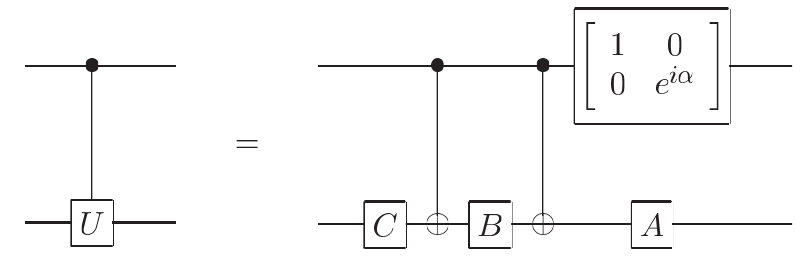
We can see that in this way, U is applied when control qubit is one and nothing is applied when it is zero. (as $ABC=I$).  
Note that a phase gate is applied to control qubit, which adds a global phase $e^{i\alpha} $ to the second qubit when we want to apply U, i.e when control is one.   
  
Hence, using the above given circuit, we can implement Controlled-U gate just by using CNOT and single qubit gates. We have used 3 CNOTs and 5 rotation gates to implement this, thus we can say that any C-U gate can be implemented by just using these 8 gates. 

### 2.1.b 3) 

# 2.2 - Quantum Random Walks (10 pts. total + 2 optional)
Quantum random walks can be extremely powerful for modeling various different physical phenomena. In this problem, you will explore so-called <i>discrete-time</i> quantum walks (DTQWs). 

A DTQW is defined on two Hilbert spaces $\mathcal{H}_c \otimes \mathcal{H}_p$. The first Hilbert space represents the degree of freedom of a <i>quantum coin</i>, while the second contains the <i>position</i> of the walker. Consider in particular a walk on a ring of 16 nodes. In this case, $\mathcal{H}_c$ has dimension 2 (two possible directions at each step), while $\mathcal{H}_p$ has dimension 4 (bits necessary to represent numbers from 0 to 15). 

At each step, the walker tosses the coin in order to decide in which direction to go. To do so, they apply a unitary operator $\mathcal{C}$, acting only on the first degree of freedom. Then, they apply a conditional shift operator $\mathcal{S}$, which updates the position according to the result of the coin toss. If $\ket{\uparrow}$ and $\ket{\downarrow}$ are the possible states of the coin, then the conditional shift operator has the form:
$$\mathcal{S} = \ket{\uparrow}\bra{\uparrow} \otimes \mathcal{R} + \ket{\downarrow}\bra{\downarrow} \otimes \mathcal{L}$$
where $\mathcal{L}$ and $\mathcal{R}$ are, respectively, the operator shifting the position to the left, and the operator shifting the position to the right.

The purpose of this exercise is to build a DTQW in Qiskit.

### 2.2.a Incrementer circuit (2 pts.)
The first step is to build the $\mathcal{L}$ and $\mathcal{R}$ operators. Here, the position is encoded in $\mathcal{H}_p$, with basis states $\ket{0},\ldots,\ket{15}$. Therefore, the position can be represented using 4 qubits. The $\mathcal{R}$ operator has to map the basis state $\ket{i}$ onto the basis state $\ket{i+1}$. Conversely, $\mathcal{L}\ket{i} = \ket{i-1}$. 

Since the walk is taking place on a ring, you can impose periodic boundary conditions:
$$\mathcal{L}\ket{0} = \ket{15} \,\,\,\,\, ; \,\,\,\,\, \mathcal{R}\ket{15} = \ket{0}.$$

The $\mathcal{R}$ circuit can be implemented using the circuit

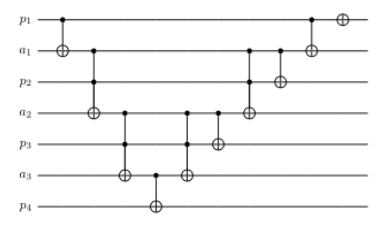

Here, the position is encoded in the qubits labeled $p_1,\ldots,p_4$, while the other qubits, labeled with $a$, are ancillary. 

Create the $\mathcal{R}$ circuit in Qiskit. Plot the diagram of the circuit, and print its $\LaTeX$ source code.

Once you have created your $\mathcal{R}$ operator, turn it into a user-defined gate (see <a href="https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.to_gate.html">here</a> for a Qiskit function for his purpose).

In [6]:
'''Designing R operator by applying the gates as shown in the above circuit'''
r_circ = QuantumCircuit(7)
r_circ.cnot(0,1)
r_circ.toffoli(1,2,3)
r_circ.toffoli(3,4,5)
r_circ.cnot(5,6)
r_circ.toffoli(3,4,5)
r_circ.cnot(3,4)
r_circ.toffoli(1,2,3)
r_circ.cnot(1,2)
r_circ.cnot(0,1)
r_circ.x(0)

'''using to_gate to convert the R-circuit to a gate'''
r_gate = r_circ.to_gate(label='R')
print("R-operator: \n ", r_circ)                                       #printing diagram of the circuit
r_circ.draw(output='latex_source') #printing latex source code of the circuit
 

R-operator: 
                                                    ┌───┐
q_0: ──■───────────────────────────────────────■──┤ X ├
     ┌─┴─┐                                   ┌─┴─┐└───┘
q_1: ┤ X ├──■────────────────────────■────■──┤ X ├─────
     └───┘  │                        │  ┌─┴─┐└───┘     
q_2: ───────■────────────────────────■──┤ X ├──────────
          ┌─┴─┐                    ┌─┴─┐└───┘          
q_3: ─────┤ X ├──■─────────■────■──┤ X ├───────────────
          └───┘  │         │  ┌─┴─┐└───┘               
q_4: ────────────■─────────■──┤ X ├────────────────────
               ┌─┴─┐     ┌─┴─┐└───┘                    
q_5: ──────────┤ X ├──■──┤ X ├─────────────────────────
               └───┘┌─┴─┐└───┘                         
q_6: ───────────────┤ X ├──────────────────────────────
                    └───┘                              


'\\documentclass[border=2px]{standalone}\n\n\\usepackage[braket, qm]{qcircuit}\n\\usepackage{graphicx}\n\n\\begin{document}\n\\scalebox{1.0}{\n\\Qcircuit @C=1.0em @R=0.2em @!R { \\\\\n\t \t\\nghost{{q}_{0} :  } & \\lstick{{q}_{0} :  } & \\ctrl{1} & \\qw & \\qw & \\qw & \\qw & \\qw & \\qw & \\qw & \\ctrl{1} & \\gate{\\mathrm{X}} & \\qw & \\qw\\\\\n\t \t\\nghost{{q}_{1} :  } & \\lstick{{q}_{1} :  } & \\targ & \\ctrl{1} & \\qw & \\qw & \\qw & \\qw & \\ctrl{1} & \\ctrl{1} & \\targ & \\qw & \\qw & \\qw\\\\\n\t \t\\nghost{{q}_{2} :  } & \\lstick{{q}_{2} :  } & \\qw & \\ctrl{1} & \\qw & \\qw & \\qw & \\qw & \\ctrl{1} & \\targ & \\qw & \\qw & \\qw & \\qw\\\\\n\t \t\\nghost{{q}_{3} :  } & \\lstick{{q}_{3} :  } & \\qw & \\targ & \\ctrl{1} & \\qw & \\ctrl{1} & \\ctrl{1} & \\targ & \\qw & \\qw & \\qw & \\qw & \\qw\\\\\n\t \t\\nghost{{q}_{4} :  } & \\lstick{{q}_{4} :  } & \\qw & \\qw & \\ctrl{1} & \\qw & \\ctrl{1} & \\targ & \\qw & \\qw & \\qw & \\qw & \\qw & \\qw\\\\\n\t \t\\nghost{{q}_{5} :  } & 

## 2.2.b Decrementer circuit (3 pts.)
From the incrementer circuit, now turn to the decrementer circuit $\mathcal{L}$, which has a very similar structure to $\mathcal{R}$. 

Create the $\mathcal{L}$ circuit, plot its diagram and turn it into a user-defined gate.

In [7]:
'''R|i> = |i+1> and L operator is inverse of R as, L|i+1> = |i> '''
l_circ = r_circ.inverse()        #using the inverse function to get the cirucit for l-operator 
print(l_circ)
l_gate = l_circ.to_gate(label='L')

     ┌───┐                                             
q_0: ┤ X ├──■───────────────────────────────────────■──
     └───┘┌─┴─┐                                   ┌─┴─┐
q_1: ─────┤ X ├──■────■────────────────────────■──┤ X ├
          └───┘┌─┴─┐  │                        │  └───┘
q_2: ──────────┤ X ├──■────────────────────────■───────
               └───┘┌─┴─┐                    ┌─┴─┐     
q_3: ───────────────┤ X ├──■────■─────────■──┤ X ├─────
                    └───┘┌─┴─┐  │         │  └───┘     
q_4: ────────────────────┤ X ├──■─────────■────────────
                         └───┘┌─┴─┐     ┌─┴─┐          
q_5: ─────────────────────────┤ X ├──■──┤ X ├──────────
                              └───┘┌─┴─┐└───┘          
q_6: ──────────────────────────────┤ X ├───────────────
                                   └───┘               


## 2.2.c Conditional shift operator (1 pt.)
Using the previously defined $\mathcal{L}$ and $\mathcal{R}$ operators, you will now need to create the conditional shift operator $\mathcal{S}$. This requires conditioning $\mathcal{R}$ and $\mathcal{L}$ on another qubit, which will represent the coin. 

Create the $\mathcal{S}$ circuit using the previously defined $\mathcal{R}$ and $\mathcal{L}$. To learn how to create the controlled version of a unitary gate, you can have a look <a href="https://qiskit.org/documentation/stubs/qiskit.circuit.ControlledGate.html">here</a>.

In [8]:
shift_op = QuantumCircuit(8)
#Shift operator can be designed by putting R gate when coin is |up> and L gate when coin is |down> 
ctrl_r = r_gate.control(1, ctrl_state='0')
ctrl_l = l_gate.control(1)         #open control for L-operator
shift_op.append(ctrl_r, list(range(8)))
shift_op.append(ctrl_l, list(range(8)))
print(shift_op)

                 
q_0: ──o─────■───
     ┌─┴──┐┌─┴──┐
q_1: ┤0   ├┤0   ├
     │    ││    │
q_2: ┤1   ├┤1   ├
     │    ││    │
q_3: ┤2   ├┤2   ├
     │    ││    │
q_4: ┤3 R ├┤3 L ├
     │    ││    │
q_5: ┤4   ├┤4   ├
     │    ││    │
q_6: ┤5   ├┤5   ├
     │    ││    │
q_7: ┤6   ├┤6   ├
     └────┘└────┘


## 2.2.d Step operator (1 pt.)
Combining the conditional shift operator $\mathcal{S}$ and the coin operator $\mathcal{C}$, you can now create the whole step operator. 

As coin operator, in principle one could choose any operator in $SU(2)$. However, it is a very common choice to use the Hadamard operator $H$ for this purpose.

Using the Hadamard gate <code>H</code> as the coin operator, create the step circuit, and turn it into a user-defined gate. 

In [9]:
step_circ = QuantumCircuit(8)
step_circ.h(0)                   #hadamard, representing coin flip


#step_circ.x(0)
step_circ.append(ctrl_l, list(range(8)))
step_circ.append(ctrl_r, list(range(8)))
print(step_circ)
step_op = step_circ.to_gate(label='Step Op')

     ┌───┐            
q_0: ┤ H ├──■─────o───
     └───┘┌─┴──┐┌─┴──┐
q_1: ─────┤0   ├┤0   ├
          │    ││    │
q_2: ─────┤1   ├┤1   ├
          │    ││    │
q_3: ─────┤2   ├┤2   ├
          │    ││    │
q_4: ─────┤3 L ├┤3 R ├
          │    ││    │
q_5: ─────┤4   ├┤4   ├
          │    ││    │
q_6: ─────┤5   ├┤5   ├
          │    ││    │
q_7: ─────┤6   ├┤6   ├
          └────┘└────┘


## 2.2.e Perform a walk (1 pt.)
A walk is composed of a succession of many steps. To create an $n$-step walk, you have to apply the step operator to an initial state $n$ times. Let the initial state be
$$\ket{\psi_0} = \ket{\uparrow} \otimes \ket{3}$$
Create a circuit able to prepare the initial state, then to perform 5 steps of a quantum walk. At the end of the walk, measure all the qubits encoding the position of the walker, and show a histogram of the outcomes.

<b>Note.</b> The outcomes will be, by Qiskit's default behaviour, expressed in binary form. Please translate them into decimal form in order to obtain plot of the position probability distribution after 5 steps.

          ┌──────────┐┌──────────┐┌──────────┐┌──────────┐┌──────────┐         »
q_0: ─────┤0         ├┤0         ├┤0         ├┤0         ├┤0         ├─────────»
     ┌───┐│          ││          ││          ││          ││          │┌─┐      »
q_1: ┤ X ├┤1         ├┤1         ├┤1         ├┤1         ├┤1         ├┤M├──────»
     └───┘│          ││          ││          ││          ││          │└╥┘      »
q_2: ─────┤2         ├┤2         ├┤2         ├┤2         ├┤2         ├─╫───────»
     ┌───┐│          ││          ││          ││          ││          │ ║ ┌─┐   »
q_3: ┤ X ├┤3         ├┤3         ├┤3         ├┤3         ├┤3         ├─╫─┤M├───»
     └───┘│  Step Op ││  Step Op ││  Step Op ││  Step Op ││  Step Op │ ║ └╥┘   »
q_4: ─────┤4         ├┤4         ├┤4         ├┤4         ├┤4         ├─╫──╫────»
          │          ││          ││          ││          ││          │ ║  ║ ┌─┐»
q_5: ─────┤5         ├┤5         ├┤5         ├┤5         ├┤5         ├─╫──╫─┤M├»
          │          ││     

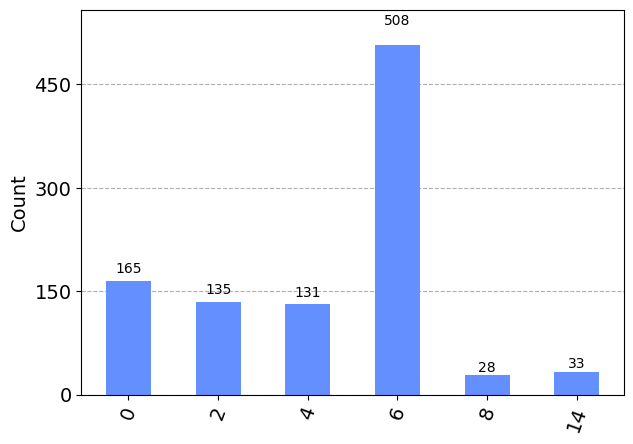

In [10]:
walk = QuantumCircuit(8,4)
walk.x([1,3])                   #|3> is when p1p2p3p4 is 1100. Hence we apply x gate to p1 and p2
steps = 5
for i in range(steps) : 
    walk.append(step_op, list(range(8)))                  #adding step_op 5 times on walk circuit
    
#reversing measurement order on classical registers to compensate for the default order in qiskit
walk.measure([1,3,5,7],[3,2,1,0])   
print(walk)

job=execute(walk, qasm, shots=1000)
result = job.result()
counts = result.get_counts()
print("Counts :", counts)

#finding the states in decimal format. 
keys = []
values = []
for i in counts : 
    dec = 0
    for j in range(4): 
        #print("j=", j, "i=", i, "i[j]=",i[j])
        dec += ((2 ** j) * int(i[j]))                 #i is the binary string, dec gives its decimal equivalent 
        #print("----------------------------")
    #print(i,dec)
    #print("=======================================")
    values.append(counts[i])
    keys.append(dec)
counts_dec = dict(zip(keys, values)) 
print("Counts with states in decimal representation", counts_dec)
plot_histogram(counts_dec)
#plot_histogram(counts)

## 2.2.f Transpiling (2 pts.)
<b>Note.</b> You may want to attempt <a href="#transpiling_exercise">exercise 2.4</a> below before proceeding with this question.

In practice, not all gates are available on a physical quantum computer, depending on its specific technological implementation. However, being able to execute a complete set of quantum gates allows one to perform any quantum calculation. For example, the set composed of the <code>CNOT</code>, the <code>H</code>, and the <code>RZ</code> gate is complete.

Qiskit gives the possibility to rewrite a circuit in terms of a given complete set of gates (Have a look <a href="https://qiskit.org/documentation/stubs/qiskit.compiler.transpile.html">here</a> to learn how to proceed). In Qiskit's jargon, this procedure is called <b>transpiling</b>.

Transpile the step operator on the gates set composed by <code>H</code>, <code>CNOT</code> and <code>RZ</code>, and plot the outcoming circuit.

## step_tp = transpile(step_circ, basis_gates = ["cx", "rz", "h"] ) 
print(step_tp)

## 2.2.g Comparison with a classical walk (2 pts. - optional)
The DTQW is the quantum counterpart of the classical discrete-time random walk. If you are not familiar with classical random walks, this <a href="https://en.wikipedia.org/wiki/Random_walk#One-dimensional_random_walk">Wikipedia page</a> is a good starting place to find out more.

Write a Python script which plots the probability distribution after 5 steps of a classical walk on a 16-ring, with a fair coin, and plot it in the same graph as the DTQW outcomes from above. Comment the similarity and differences.

<b>Note.</b> There are (at least) two possible ways of simulating classical walks. You can use a MonteCarlo approach (many repetitions, based on a random number generator), or a more mathematical perspective employing building the transition matrices for a Markov process. Both approaches are acceptable, but keep in mind that MonteCarlo simulations are affected by simulation errors.

# 2.3 - Bernstein-Vazirani Algorithm (2 pts.)
Let $a$ be an unknown integer number, $0\leq a \leq 2^n$ and let it be represented in binary form as $a=a_0 a_1 a_2 \ldots a_{n-1}$. Consider the function:
$$
    f(x) = a\cdot x = a_0 x_0 \oplus \ldots \oplus a_{n-1}x_{n-1}. 
$$
Suppose that we are able to apply the function on any $n$-bits input through a suitable black-box oracle $U_f$, working in this way:

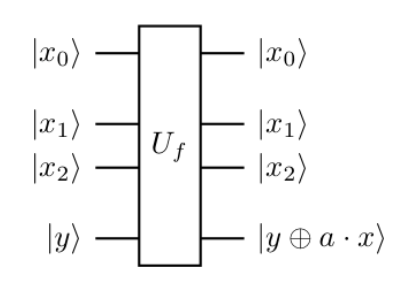

We can determine the value of $a$ by using the Bernstein-Vazirani Algorithm, employing a circuit with the following structure:

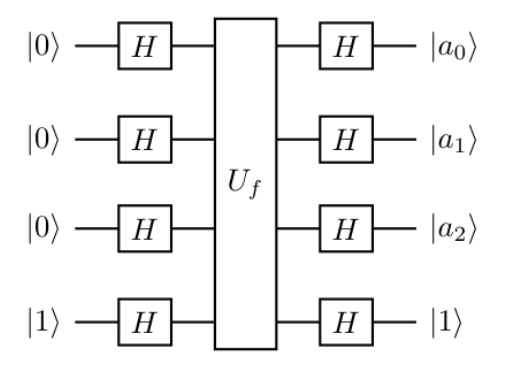

In the next cell, you are given the quantum gate $U_f$, but you do not know the value of $a$. Create a Bernstein-Vazirani circuit, plot it, and by performing suitable measurements retrieve the value of $a$.

In [12]:
oracle = qiskit.QuantumCircuit(4)
oracle.cx(0,3)
oracle.cx(2,3)
print(oracle)
Uf = oracle.to_gate(label="Uf")
'''Creatig bernstein vazirani circuit to find a, as shown above'''
bv_circ = QuantumCircuit(4)
bv_circ.x(3)
bv_circ.h([0,1,2,3])
bv_circ.append(oracle, [0,1,2,3])
bv_circ.h([0,1,2,3])
bv_circ.measure_all()
print(bv_circ)

job_bv =execute(bv_circ, qasm, shots=1000)
result_bv = job_bv.result()
counts_bv = result_bv.get_counts()
print("Counts :", counts_bv)
for i in counts_bv :
    meas_res = i
a = meas_res[-1:-4:-1]
print("a =", a, "in binary and ", int(a,2), "in decimal")    #finding binary of a by slicing the string meas_res

#plot_histogram(counts_bv)
#plot_histogram(counts)

               
q_0: ──■───────
       │       
q_1: ──┼───────
       │       
q_2: ──┼────■──
     ┌─┴─┐┌─┴─┐
q_3: ┤ X ├┤ X ├
     └───┘└───┘
        ┌───┐     ┌──────────────┐┌───┐ ░ ┌─┐         
   q_0: ┤ H ├─────┤0             ├┤ H ├─░─┤M├─────────
        ├───┤     │              │├───┤ ░ └╥┘┌─┐      
   q_1: ┤ H ├─────┤1             ├┤ H ├─░──╫─┤M├──────
        ├───┤     │  circuit-873 │├───┤ ░  ║ └╥┘┌─┐   
   q_2: ┤ H ├─────┤2             ├┤ H ├─░──╫──╫─┤M├───
        ├───┤┌───┐│              │├───┤ ░  ║  ║ └╥┘┌─┐
   q_3: ┤ X ├┤ H ├┤3             ├┤ H ├─░──╫──╫──╫─┤M├
        └───┘└───┘└──────────────┘└───┘ ░  ║  ║  ║ └╥┘
meas: 4/═══════════════════════════════════╩══╩══╩══╩═
                                           0  1  2  3 
Counts : {'1101': 1000}
a = 101 in binary and  5 in decimal


Following the example of the given oracle, write a Python script that takes as input a value of $a$ between 0 and 7, and outputs the Qiskit circuit for the relevant oracle, plotting it.

In [13]:
while True:
    try:
        a = int(input('Enter a number between 0 and 7: \n '))
        assert 0 <= a <= 7
    except ValueError:
        print("Not an integer! Please enter an integer.")
    except AssertionError:
        print("Please enter an integer between 0 and 7")
    else:
        break
# print(a)
a = str(bin(a)[2:])    #(converting integer to binary)
#print(a)
circuit = QuantumCircuit(len(a)+1, len(a))       #creating a circuit corresponding to length of a 
circuit.x(len(a))
circuit.h(range(len(a)+1))                       #applying H to all the qubits


circuit.barrier()

for ii, yesno in enumerate(reversed(a)) :  #putting cx wherever required. Reference : qiskit video tutorial on bernstein-vazirani
    print(a)
    print(reversed(a))
    print(enumerate(reversed(a)))
    print(ii)
    print(yesno)
    if yesno == '1' : 
        circuit.cx(ii, len(a))
        
circuit.barrier()
circuit.h(range(len(a)))
circuit.measure(range(len(a)), range(len(a)))
print(circuit)

result = execute(circuit, backend = qasm, shots = 1).result()
counts = result.get_counts()
print(counts)
#converting a to decimal
dec_a = 0
for i in counts : 
    for j in range(len(i)) : 
        dec_a += 2 ** j * int(i[len(i)-j-1])
print("a is :", dec_a)

Enter a number between 0 and 7: 
 6
110
0
0
110
1
1
110
2
1
     ┌───┐      ░            ░ ┌───┐┌─┐      
q_0: ┤ H ├──────░────────────░─┤ H ├┤M├──────
     ├───┤      ░            ░ ├───┤└╥┘┌─┐   
q_1: ┤ H ├──────░───■────────░─┤ H ├─╫─┤M├───
     ├───┤      ░   │        ░ ├───┤ ║ └╥┘┌─┐
q_2: ┤ H ├──────░───┼────■───░─┤ H ├─╫──╫─┤M├
     ├───┤┌───┐ ░ ┌─┴─┐┌─┴─┐ ░ └───┘ ║  ║ └╥┘
q_3: ┤ X ├┤ H ├─░─┤ X ├┤ X ├─░───────╫──╫──╫─
     └───┘└───┘ ░ └───┘└───┘ ░       ║  ║  ║ 
c: 3/════════════════════════════════╩══╩══╩═
                                     0  1  2 
{'110': 1}
a is : 6


<a id="transpiling_exercise"></a>
# 2.4 - Transpiling (4 pts. total)

In order to transform a circuit from its theoretical form to something applicable on a specific, real-world quantum computer we need to **transpile** it. Thereby we take into account:
<ul>
    <li>the gates available on the computer we want to consider;</li>
    <li>the <it>topology</it> of the computer, i.e. which qubits can interact with which.</li>
</ul>
In general, transpiling a quantum circuit is not simple at all, and it is usually left to automatic calculators. In this exercise, we will mimick the transpiling procedure, to exploit some interesting relations among quantum gates.

## 2.4.a Change of basis gates (1 pt.)
In the following cell, a simple quantum circuit, involving four qubits, is defined in terms of <code>CNOT</code> gates and <code>H</code> gates. Rewrite the circuit in terms of <code>CZ</code> and <code>H</code> gates. 

<b>Note.</b> This part of the exercise should be perfomed manually, and carefully justified step by step.

In [14]:
circuit = qiskit.QuantumCircuit(4)
circuit.cx(1,2)
circuit.cx(0,1)
circuit.h(2)
circuit.cx(0,3)

print(circuit)
circuit.measure_all()

                    
q_0: ───────■────■──
          ┌─┴─┐  │  
q_1: ──■──┤ X ├──┼──
     ┌─┴─┐├───┤  │  
q_2: ┤ X ├┤ H ├──┼──
     └───┘└───┘┌─┴─┐
q_3: ──────────┤ X ├
               └───┘


Cnot gate can be written in terms of cz and H gate as follows :   
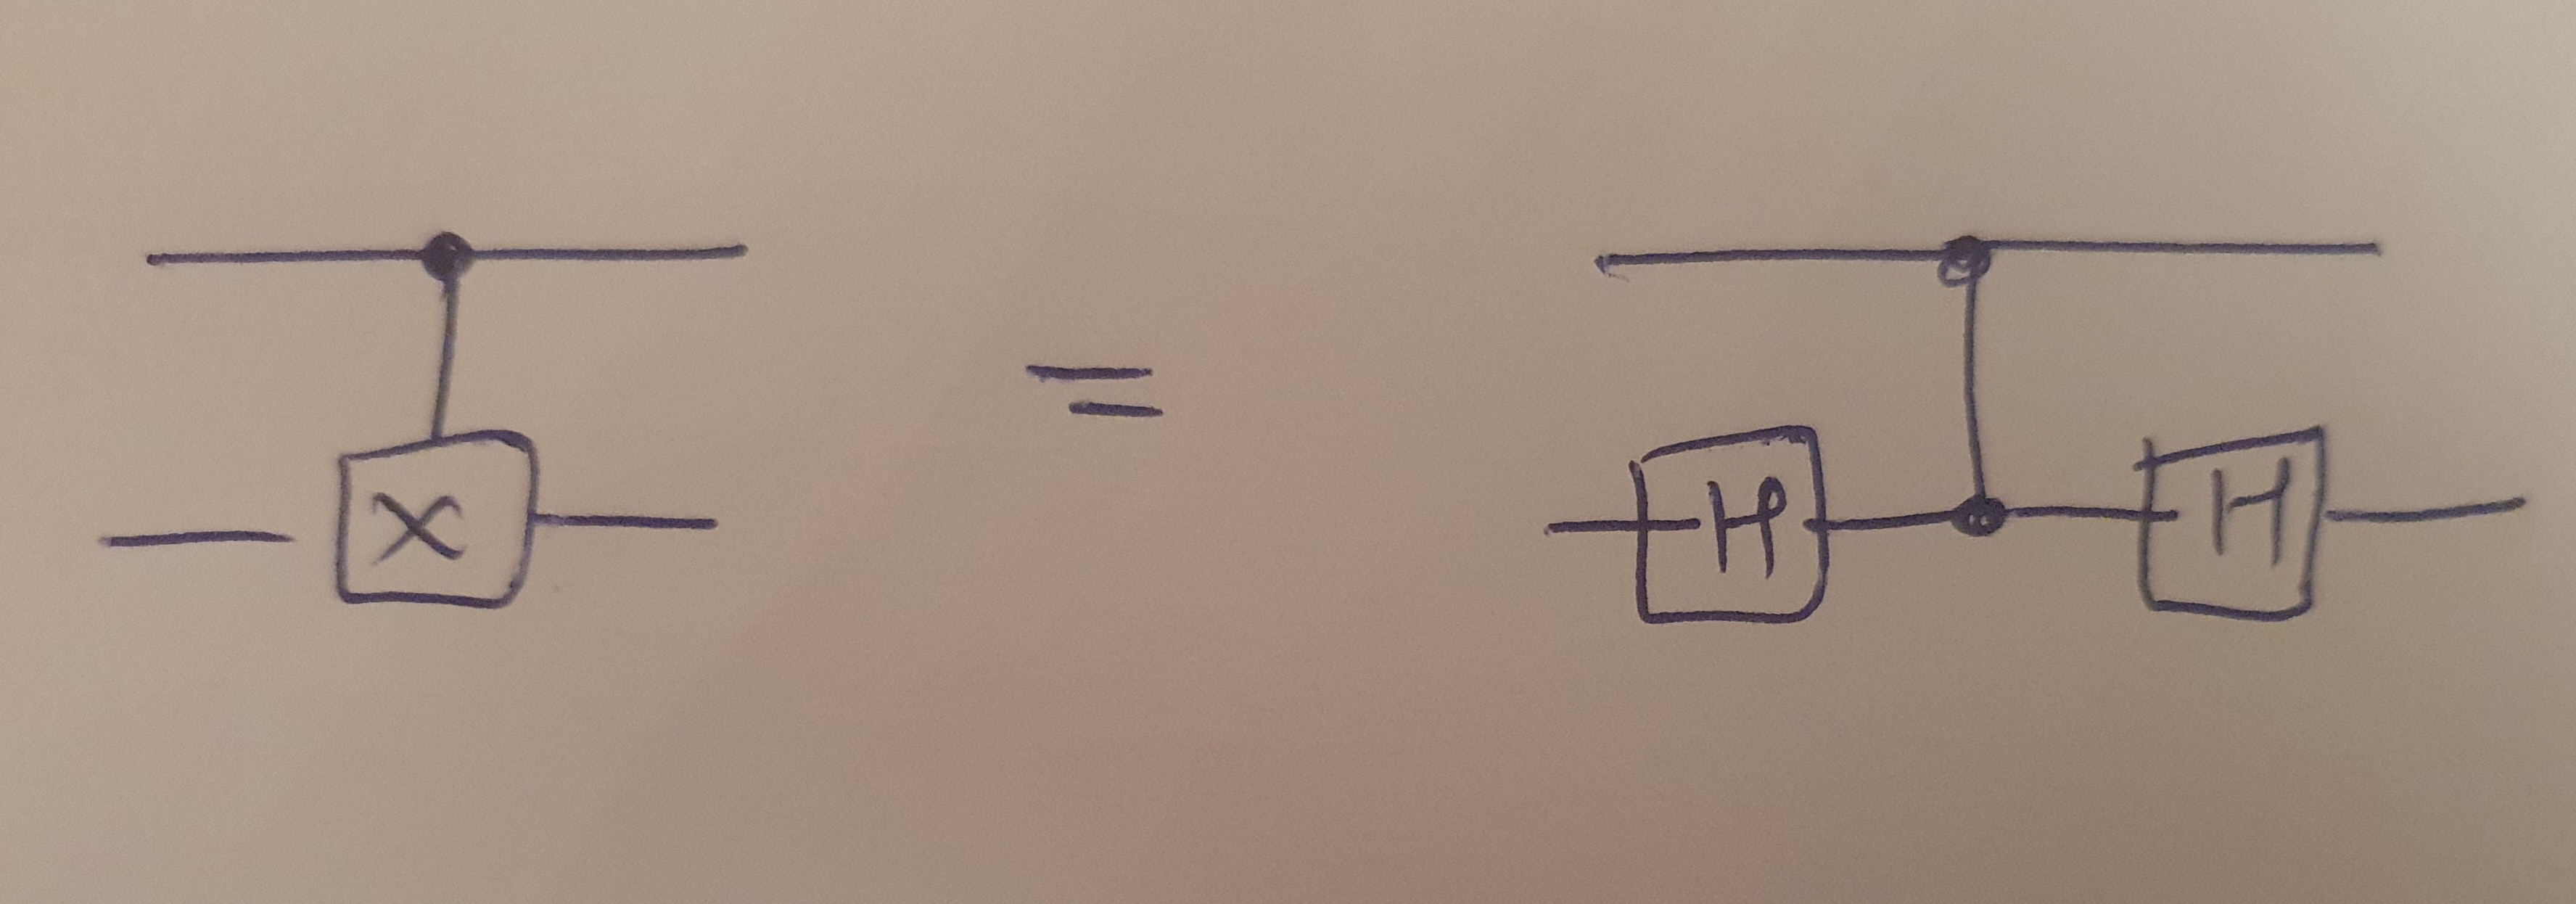  
On replacing every CNOT gate in the cirucit with CZ and H gates, we get the following circuit :  


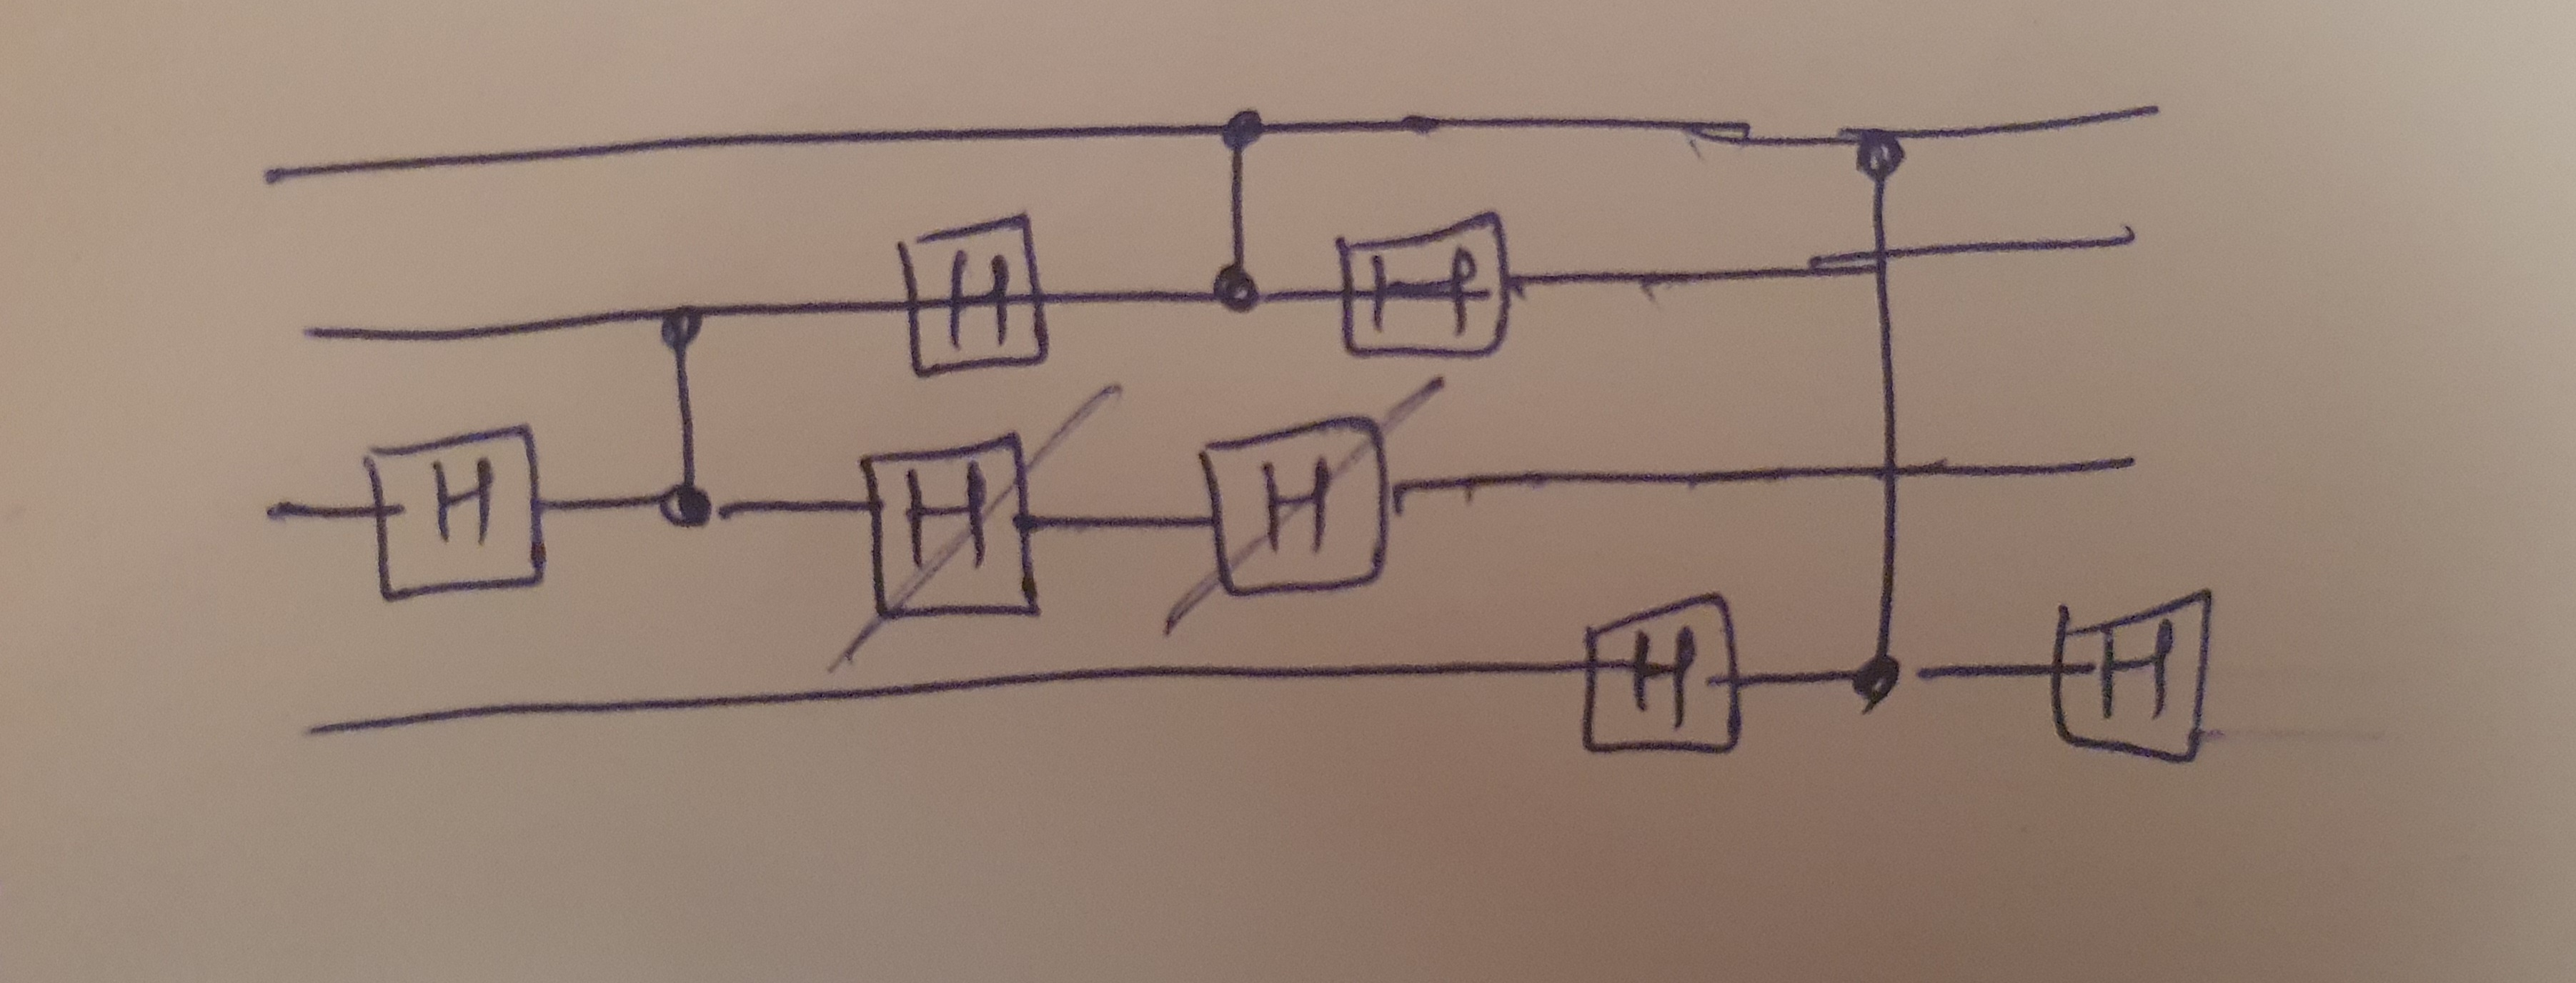  
In the above circuit, the two consecutive Hadamard will cancel each other and give identity. Thus, we will get the circuit as designed in the next code cell

In [15]:
new_circ = QuantumCircuit(4)
new_circ.h(2)
new_circ.cz(1,2)
new_circ.h(1)
new_circ.cz(0,1)
new_circ.h(1)
new_circ.h(3)
new_circ.cz(0,3)
new_circ.h(3)

print(new_circ)
new_circ.measure_all()

                                  
q_0: ──────────────■───────■──────
             ┌───┐ │ ┌───┐ │      
q_1: ──────■─┤ H ├─■─┤ H ├─┼──────
     ┌───┐ │ └───┘   └───┘ │      
q_2: ┤ H ├─■───────────────┼──────
     ├───┤                 │ ┌───┐
q_3: ┤ H ├─────────────────■─┤ H ├
     └───┘                   └───┘


## 2.4.b Verification of the new circuit (1 pt.)
Now, code and plot the circuit you obtained in Qiskit. Insert measurement operations in both the "old" and the "new" circuit, and show that they give equivalent outcomes.

In [16]:
job_circ =execute(circuit, qasm, shots=1000)
result_circ = job_circ.result()
counts_circ = result_circ.get_counts()
print("Counts :", counts_circ)


job_new =execute(new_circ, qasm, shots=1000)
result_new = job_new.result()
counts_new = result_new.get_counts()
print("Counts :", counts_new)


Counts : {'0100': 500, '0000': 500}
Counts : {'0000': 503, '0100': 497}


The outcomes show that 0100 and 0000 appear with similar probability. This means that both the circuits have same probability amplitudes. Though, they might have a phase difference which cannot be shown by measuring these results. We can compare their unitary matrices to see that both the circuits are equivalent. 

## 2.4.c Topology/1 (1 pt.)
In the following cell, the basis gates and the adjacency matrix for the IBM quantum computer Nairobi are shown. Using the automatic methods provided by Qiskit, transpile the circuit defined in the previous exercise, in order to make it executable with the available gates and topology. See <a href="https://qiskit.org/documentation/stubs/qiskit.compiler.transpile.html">here</a> for some documentation about the automatic transpiling function. Plot the resulting circuit.

In [17]:
basis_gates = ["cx", "id", "rz", "sx", "x"]
adjacency_matrix = [[0,1],[1,0],[1,2],[2,1],[1,3],[3,1],[3,5],[5,3],[4,5],[5,4],[5,6],[6,5]]
tr_circuit = transpile(circuit, basis_gates = basis_gates, coupling_map = adjacency_matrix)
print(tr_circuit)

global phase: π/4
                                                                    
ancilla_0 -> 0 ─────────────────────────────────────────────────────
                            ┌───┐                     ░          ┌─┐
      q_3 -> 1 ─────────────┤ X ├─────────────────────░──────────┤M├
                            └─┬─┘                     ░          └╥┘
ancilla_1 -> 2 ───────────────┼───────────────────────────────────╫─
                              │                       ░ ┌─┐       ║ 
      q_0 -> 3 ───────■───────■───────────────────────░─┤M├───────╫─
               ┌───┐  │  ┌─────────┐┌────┐┌─────────┐ ░ └╥┘   ┌─┐ ║ 
      q_2 -> 4 ┤ X ├──┼──┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├─░──╫────┤M├─╫─
               └─┬─┘┌─┴─┐└─────────┘└────┘└─────────┘ ░  ║ ┌─┐└╥┘ ║ 
      q_1 -> 5 ──■──┤ X ├─────────────────────────────░──╫─┤M├─╫──╫─
                    └───┘                             ░  ║ └╥┘ ║  ║ 
ancilla_2 -> 6 ──────────────────────────────────────────╫──╫──╫──╫─
                

## 2.4.d Topology/2 (1 pt.)
Using your IBMq account, you have direct and automatic access to the datasheet of all the freely available IBM quantum computers. Exploting the <code>backend</code> argument of the <code>transpile</code> function (or directly IBMq website), transpile the circuit in such a way that it is executable on the backend <code>ibmq_montreal</code>. Draw the corresponding circuit. By looking at the topology and the available gates on <code>ibmq_montreal</code>, comment on analogies and differences from the circuit obtained in the previous exercise.

In [18]:
back_mont = FakeMontrealV2()         #fake montreal has the same design as the real hardware. 
transpiled_circ = transpile(new_circ, back_mont)
transpiled_circ.draw()

global phase: π/4
                                                                 
  ancilla_0 -> 0 ────────────────────────────────────────────────
                                                                 
  ancilla_1 -> 1 ────────────────────────────────────────────────
                                                                 
  ancilla_2 -> 2 ────────────────────────────────────────────────
                                                                 
  ancilla_3 -> 3 ────────────────────────────────────────────────
                                                                 
  ancilla_4 -> 4 ────────────────────────────────────────────────
                                 ┌───┐             ░          ┌─┐
        q_3 -> 5 ────────────────┤ X ├─────────────░──────────┤M├
                                 └─┬─┘             ░          └╥┘
  ancilla_5 -> 6 ──────────────────┼───────────────────────────╫─
                                   │                           ║ 
  ancilla_6 -> 7 ──────────────────┼───────────────────────────╫─
                                   │               ░ ┌─┐       ║ 
        q_0 -> 8 ──────────■───────■───────────────░─┤M├───────╫─
                           │                       ░ └╥┘       ║ 
  ancilla_7 -> 9 ──────────┼──────────────────────────╫────────╫─
                           │                          ║        ║ 
 ancilla_8 -> 10 ──────────┼──────────────────────────╫────────╫─
                         ┌─┴─┐                     ░  ║ ┌─┐    ║ 
       q_1 -> 11 ──■─────┤ X ├─────────────────────░──╫─┤M├────╫─
                   │     └───┘                     ░  ║ └╥┘    ║ 
 ancilla_9 -> 12 ──┼──────────────────────────────────╫──╫─────╫─
                   │                                  ║  ║     ║ 
ancilla_10 -> 13 ──┼──────────────────────────────────╫──╫─────╫─
                 ┌─┴─┐┌─────────┐┌────┐┌─────────┐ ░  ║  ║ ┌─┐ ║ 
       q_2 -> 14 ┤ X ├┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├─░──╫──╫─┤M├─╫─
                 └───┘└─────────┘└────┘└─────────┘ ░  ║  ║ └╥┘ ║ 
ancilla_11 -> 15 ─────────────────────────────────────╫──╫──╫──╫─
                                                      ║  ║  ║  ║ 
ancilla_12 -> 16 ─────────────────────────────────────╫──╫──╫──╫─
                                                      ║  ║  ║  ║ 
ancilla_13 -> 17 ─────────────────────────────────────╫──╫──╫──╫─
                                                      ║  ║  ║  ║ 
ancilla_14 -> 18 ─────────────────────────────────────╫──╫──╫──╫─
                                                      ║  ║  ║  ║ 
ancilla_15 -> 19 ─────────────────────────────────────╫──╫──╫──╫─
                                                      ║  ║  ║  ║ 
ancilla_16 -> 20 ─────────────────────────────────────╫──╫──╫──╫─
                                                      ║  ║  ║  ║ 
ancilla_17 -> 21 ─────────────────────────────────────╫──╫──╫──╫─
                                                      ║  ║  ║  ║ 
ancilla_18 -> 22 ─────────────────────────────────────╫──╫──╫──╫─
                                                      ║  ║  ║  ║ 
ancilla_19 -> 23 ─────────────────────────────────────╫──╫──╫──╫─
                                                      ║  ║  ║  ║ 
ancilla_20 -> 24 ─────────────────────────────────────╫──╫──╫──╫─
                                                      ║  ║  ║  ║ 
ancilla_21 -> 25 ─────────────────────────────────────╫──╫──╫──╫─
                                                      ║  ║  ║  ║ 
ancilla_22 -> 26 ─────────────────────────────────────╫──╫──╫──╫─
                                                      ║  ║  ║  ║ 
         meas: 4/═════════════════════════════════════╩══╩══╩══╩═
                                                      0  1  2  3

The montreal transpiled circuit uses lesser gates. It has optimized the choice of gates in order to use as less gates as possible, wherever they are neccessary. The mapping of qubits is also very different and it contributed in getting an efficient circuit. 

# 2.5 Measuring an operator (3 pts.)
Let $\mathcal{U}$ be a single qubit operator, which is both Hermitian and unitary. That is, $\mathcal{U}$ can be seen both as an observable and as a quantum gate. 
<ol>
    <li>Prove that the only possible eigenvalues of $\mathcal{U}$ are $\pm 1$.
    <li>Suppose in particular that $\mathcal{U}$ has exactly one eigenvalue equal to $1$ and exactly one eigenvalue equal to $-1$. Consider the circuit drawn in figure below and prove that, for any input state $\ket{\psi_{in}}$, it "measures" $\mathcal{U}$, i.e.:
        <ul>
            <li>the output state $\ket{\psi_{out}}$ is an eigenstate of $\mathcal{U}$;</li>
            <li>the outcome of the measurement (on the computational basis) on the first qubit can be bijectively mapped onto the eigenvalue corresponding to the eigenstate $\ket{\psi_{out}}$</li>
        </ul>
 </ol>
 
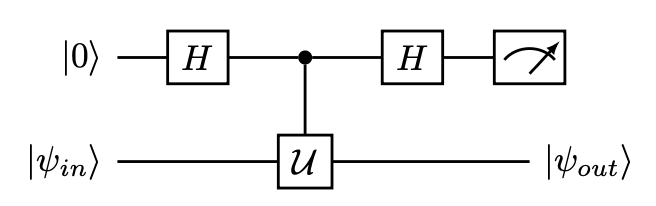

### 2.5 1)   
U is hermitian,$ \implies  U^{\dagger} = U $  
and unitary $ \implies U^{\dagger} = U^{-1} $  
$$ \implies U = U^{-1} $$    
According to the eigenvalue equation,  
$$ U \ket{v_{1,2}} = \lambda_{1,2} \ket{v_{1,2}}  $$  
on multiplying $ U^{-1} $ both sides of the equation, we get : 
  
  
$ \implies U^{-1} U \ket{v_{1,2}} = U^{-1} \lambda_{1,2} \ket{v_{1,2}}  $   
  
  
$ \implies \frac{1}{\lambda_{1,2}} \ket{v_{1,2}} = U^{-1} \ket{v_{1,2}}   $  
  
As $ U $ and $ U^{-1} $ are equal, their eigenvalues, $ \lambda_{1,2} $ and $ \frac{1}{\lambda_{1,2}} $, respectively, should also equate.  
$ \lambda_{1,2} = \frac{1}{\lambda_{1,2}} $  
  
$ \implies \lambda_{1,2}^{2} = 1 $  
  
$ \implies \lambda_{1,2} = \pm 1 $

### 2.5 2)  
It is given that the eigenvalues are, $\lambda_{1,2}=\pm 1 $. Let us assume that $ U \ket{v_{1}} = \ket{v_{1}} $ and $ U \ket{v_{2}} = - \ket{v_{1}}  $  
Now, any vector, $\ket{\psi}$ can be written in terms of the sum of the eigenstates of U.  
$\implies \ket{\psi_{in}} = \alpha_{1} v_{1} + \alpha_{2} v_{2} $ where $\alpha$ is a complex number. 
Let us see how the circuit transforms the intial state : $\ket{0} \otimes \ket{\psi_{in}}$  
  
  
$H \otimes I \rightarrow \frac{\ket{0} + \ket{1}}{\sqrt{2}} \otimes \ket{\psi_{in}}$  
  
$ C-U \rightarrow \frac{\ket{0} \ket{\psi_{in}} + \ket{1} U \ket{\psi_{in}} }{2} $  
  
$H \otimes I \rightarrow \ket{0} \otimes \frac{\ket{\psi_{in}} + U \ket{\psi_{in}}}{2} + \ket{1} \otimes \frac{\ket{\psi_{in}} - U \ket{\psi_{in}}}{2} $  
  
$ \implies \ket{\psi_{out}} = \ket{0} \otimes \alpha_{1} \ket{v_{1}} + \ket{1} \otimes \alpha_{2} \ket{v_{2}} $   
  
From the obtained equation of final state on the circuit, we can see that $\ket{\psi_{out}}$ is always an eigenstate of $U$ and by measuring the above qubit we can find out the what $\ket{\psi_{out}}$ is.   

If the upper qubit is 0, $\ket{\psi_{out}}$ is proportional to $\ket{v_{1}}$ and   
If the upper qubit is 1, $\ket{\psi_{out}}$ is proportional to $\ket{v_{2}}$  
  
So, with the function $f(m) = (-1)^{m}$, where m is the measured value of the upper qubit, we can find out the eigenvalue corresponding to the $\ket{\psi_{out}}$ on the circuit. 